# **Multiclass Classifier (MNIST Dataset)** #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import warnings

warnings.filterwarnings('ignore')
jtplot.style('monokai', grid = False)

In [2]:
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('train.csv', header = 0)
train, test = train_test_split(train_df, test_size = 0.2)
x_train = train.drop(['label'], axis = 1 )
y_train = train['label']
x_test = test.drop(['label'], axis = 1 )
y_test = test['label']

**OVR: Choose a class that has the highest decision score.**

**OVO: Use binary classifier to each combination of class.**

In [3]:
##Use SVC model##
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_predict = svm_clf.predict(x_train)

0


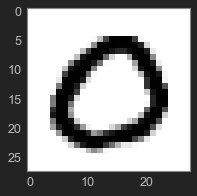

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(x_train.iloc[2].values.reshape(28,28), cmap = 'binary')
print(svm_predict[2])

In [10]:
score = svm_clf.decision_function([x_train.iloc[2]])
print(score)
print(svm_clf.classes_)   ## class check
print(np.argmax(score))

[[ 9.31564043  0.69908298  6.25095572  3.79771341 -0.30118844  8.27898896
   4.80311136  1.71733774  2.89678535  7.20735923]]
[0 1 2 3 4 5 6 7 8 9]
0


In [7]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)

array([3], dtype=int64)

In [11]:
ovr_clf.predict([x_train.iloc[2]])

array([0], dtype=int64)

In [12]:
ovr_clf.decision_function([x_train.iloc[2]])

array([[ 2.41638895, -1.99445765, -1.79328741, -2.52033284, -2.39014512,
        -2.1163357 , -2.52142507, -2.39468838, -2.64265982, -1.72345031]])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovr_clf, x_train, y_train, cv=3, scoring = 'accuracy')

array([0.97446429, 0.97071429, 0.97026786])